# Lab 2 - Spark SQL
This Lab will show you how to work with Spark SQL


#Step 1

<h3>Getting started: Create a SQL Context</h3>

<b>Type:</b>


from pyspark.sql import SQLContext<br>
sqlContext = SQLContext(sc)


In [1]:
#Create the SQLContext
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

#Step 2

<h3>Dowload a JSON Recordset to work with</h3>

Let's download the data, we can run commands on the console of the server (or docker image) that the notebook enviroment is using. To do so we simply put a "!" in front of the command that we want to run. For example:

!pwd

To get the data we will download a file to the enviroment. Simple run these two commands, the first just ensures that the file is removed if it exists:

!rm world_bank.json.gz -f <br>
!wget https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz

In [2]:
#enter the commands to remove and download file here
!rm world_bank.json.gz -f
!wget https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz

--2016-07-12 13:53:38--  https://raw.githubusercontent.com/bradenrc/sparksql_pot/master/world_bank.json.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.48.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.48.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 446287 (436K) [application/octet-stream]
Saving to: 'world_bank.json.gz'

100%[======================================>] 446,287     2.47MB/s   in 0.2s   

2016-07-12 13:53:38 (2.47 MB/s) - 'world_bank.json.gz' saved [446287/446287]



#Step 3
<h3>Create a Dataframe</h3>

Now you can create the Dataframe, note that if you wanted to see where you downloaded the file you can run !pwd or !ls

To create the Dataframe type:

example1_df = sqlContext.read.json("world_bank.json.gz")


In [3]:
#create the Dataframe here:
example1_df = sqlContext.read.json("world_bank.json.gz")

<h3>We can look at the schema with this command:</h3>

example1_df.printSchema()

In [4]:
#print out the schema
example1_df.printSchema()

root
 |-- _id: struct (nullable = true)
 |    |-- $oid: string (nullable = true)
 |-- approvalfy: string (nullable = true)
 |-- board_approval_month: string (nullable = true)
 |-- boardapprovaldate: string (nullable = true)
 |-- borrower: string (nullable = true)
 |-- closingdate: string (nullable = true)
 |-- country_namecode: string (nullable = true)
 |-- countrycode: string (nullable = true)
 |-- countryname: string (nullable = true)
 |-- countryshortname: string (nullable = true)
 |-- docty: string (nullable = true)
 |-- envassesmentcategorycode: string (nullable = true)
 |-- grantamt: long (nullable = true)
 |-- ibrdcommamt: long (nullable = true)
 |-- id: string (nullable = true)
 |-- idacommamt: long (nullable = true)
 |-- impagency: string (nullable = true)
 |-- lendinginstr: string (nullable = true)
 |-- lendinginstrtype: string (nullable = true)
 |-- lendprojectcost: long (nullable = true)
 |-- majorsector_percent: array (nullable = true)
 |    |-- element: struct (containsNu

<h3>Dataframes work like RDDs, you can map, reduce, groupby, etc. 
<br>Take a look at the first two rows of data using "take"</h3>



In [5]:
#Use take on the dataframe to pull out 2 rows
example1_df.take(2)

[Row(_id=Row($oid=u'52b213b38594d8a2be17c780'), approvalfy=u'1999', board_approval_month=u'November', boardapprovaldate=u'2013-11-12T00:00:00Z', borrower=u'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA', closingdate=u'2018-07-07T00:00:00Z', country_namecode=u'Federal Democratic Republic of Ethiopia!$!ET', countrycode=u'ET', countryname=u'Federal Democratic Republic of Ethiopia', countryshortname=u'Ethiopia', docty=u'Project Information Document,Indigenous Peoples Plan,Project Information Document', envassesmentcategorycode=u'C', grantamt=0, ibrdcommamt=0, id=u'P129828', idacommamt=130000000, impagency=u'MINISTRY OF EDUCATION', lendinginstr=u'Investment Project Financing', lendinginstrtype=u'IN', lendprojectcost=550000000, majorsector_percent=[Row(Name=u'Education', Percent=46), Row(Name=u'Education', Percent=26), Row(Name=u'Public Administration, Law, and Justice', Percent=16), Row(Name=u'Education', Percent=12)], mjsector_namecode=[Row(code=u'EX', name=u'Education'), Row(code=u'EX', name=u'

#Step 4 
<h3>Register a table</h3>

Using
DataframeObject.registerTempTable("name_of_table")

Create a table named "world_bank"

In [6]:
#Create the table to be reference
example1_df.registerTempTable("world_bank")

#Step 5
<h3>Writing SQL Statements</h3>
Using SQL Get the first 2 records
sqlContext.sql("SQL Statement") will return a Dataframe with the records

In [18]:
#Use SQL to select from table limit 2 and print the output
SQL = "select * from world_bank limit 2"

df = sqlContext.sql(SQL)
print df

DataFrame[_id: struct<$oid:string>, approvalfy: string, board_approval_month: string, boardapprovaldate: string, borrower: string, closingdate: string, country_namecode: string, countrycode: string, countryname: string, countryshortname: string, docty: string, envassesmentcategorycode: string, grantamt: bigint, ibrdcommamt: bigint, id: string, idacommamt: bigint, impagency: string, lendinginstr: string, lendinginstrtype: string, lendprojectcost: bigint, majorsector_percent: array<struct<Name:string,Percent:bigint>>, mjsector_namecode: array<struct<code:string,name:string>>, mjtheme: array<string>, mjtheme_namecode: array<struct<code:string,name:string>>, mjthemecode: string, prodline: string, prodlinetext: string, productlinetype: string, project_abstract: struct<cdata:string>, project_name: string, projectdocs: array<struct<DocDate:string,DocType:string,DocTypeDesc:string,DocURL:string,EntityID:string>>, projectfinancialtype: string, projectstatusdisplay: string, regionname: string, s

In [19]:
#Extra credit, take the Dataframe you created with the two records and convert it into Pandas
df.toPandas()

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,"(52b213b38594d8a2be17c780,)",1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"(Education for all, 100)","[(65, Education for all)]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,"(52b213b38594d8a2be17c781,)",2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,None,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"(Other economic management, 30)","[(24, Other economic management), (54, Social ...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


In [32]:
#Now Calculate a Simple count based on a group, for example "regionname"
sql = "select regionname, count(*) as cnt from world_bank group by regionname order by cnt desc"

df2 = sqlContext.sql(sql)
df2.show()

+--------------------+---+
|          regionname|cnt|
+--------------------+---+
|              Africa|152|
|East Asia and Pac...|100|
|Europe and Centra...| 74|
|          South Asia| 65|
|Middle East and N...| 54|
|Latin America and...| 53|
|               Other|  2|
+--------------------+---+



In [38]:
# With JSON data you can reference the nested data
# If you look at Schema above you can see that Sector.Name is a nested column
# Select that column and limit to reasonable output (like 2)

df.printSchema()

sql = "select sector.Name from world_bank limit 2"
sqlContext.sql(sql).show()

root
 |-- _id: struct (nullable = true)
 |    |-- $oid: string (nullable = true)
 |-- approvalfy: string (nullable = true)
 |-- board_approval_month: string (nullable = true)
 |-- boardapprovaldate: string (nullable = true)
 |-- borrower: string (nullable = true)
 |-- closingdate: string (nullable = true)
 |-- country_namecode: string (nullable = true)
 |-- countrycode: string (nullable = true)
 |-- countryname: string (nullable = true)
 |-- countryshortname: string (nullable = true)
 |-- docty: string (nullable = true)
 |-- envassesmentcategorycode: string (nullable = true)
 |-- grantamt: long (nullable = true)
 |-- ibrdcommamt: long (nullable = true)
 |-- id: string (nullable = true)
 |-- idacommamt: long (nullable = true)
 |-- impagency: string (nullable = true)
 |-- lendinginstr: string (nullable = true)
 |-- lendinginstrtype: string (nullable = true)
 |-- lendprojectcost: long (nullable = true)
 |-- majorsector_percent: array (nullable = true)
 |    |-- element: struct (containsNu

#Step 6

<h3>Creating simple graphs</h3>
Using Pandas we can do create some simple visualizations.

####First create a SQL statement that is a resonable number if items
For example, you can count the number of projects (rows) by countryname
<br>or in anothe words: 
<br>count(*), countryname from table group by countryname


In [39]:
# we need to tell the charting library (matplotlib) to display charts inline
# just run this paragraph
%matplotlib inline 
import matplotlib.pyplot as plt, numpy as np

In [40]:
# first write the sql statment and look at the data, remember to add .toPandas() to have it look nice
# an even easier option is to create a variable and set it to the SQL statement
# for example: 
query = "select count(*) as Count, countryname from world_bank group by countryname"
chart1_df = sqlContext.sql(query).toPandas()
print chart1_df

     Count                              countryname
0        1                        Republic of Chile
1        4                       Republic of Uganda
2        4  Federal Democratic Republic of Ethiopia
3        3                       Kingdom of Lesotho
4        1                    East Asia and Pacific
5        3              Republic of the Philippines
6        1              People's Republic of Angola
7        2       Democratic Republic of Timor-Leste
8        1                      Republic of Namibia
9        1                                   Tuvalu
10       1                         Republic of Chad
11       1                      Kingdom of Thailand
12       9             Islamic Republic of Pakistan
13      11                   Republic of Mozambique
14       6         Democratic Republic of the Congo
15       1                     Republic of Zimbabwe
16       2                                 Mongolia
17       4                        Republic of Benin
18       4  

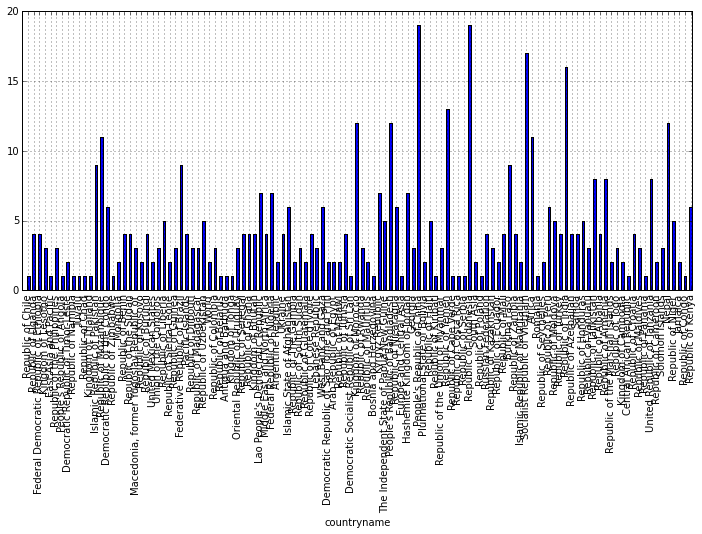

In [42]:
# now take the variable (or same sql statement) and use the method:
chart1_df.plot(kind='bar', x='countryname', y='Count', figsize=(12, 5))


#Step 7

<h3>Creating a dataframe "manually" by adding a schema to an RDD</h3>

First, we need to create an RDD of pairs or triplets. This can be done using code (for loop) as
seen in the instructor's example, or more simply by assigning values to an array.

In [43]:
# Default array defined below. Feel free to change as desired.
array=[[1,1,1],[2,2,2],[3,3,3],[4,4,4],[5,5,5]]
my_rdd = sc.parallelize(array)
my_rdd.collect()

[[1, 1, 1], [2, 2, 2], [3, 3, 3], [4, 4, 4], [5, 5, 5]]

Use first the StructField method, following these steps:<br>
1- Define your schema columns as a string<br>
2- Build the schema object using StructField<br>
3- Apply the schema object to the RDD<br>

Note: The cell below is missing some code and will not run properly until the missing code has
been completed.

In [51]:
from pyspark.sql.types import *

# The schema is encoded in a string. Complete the string below
schemaString = "ID1,ID2,ID3"

# MissingType() should be either StringType() or IntegerType(). Please replace as required.
fields = [StructField(field_name, IntegerType(), True) for field_name in schemaString.split(",")]
schema = StructType(fields)

# Apply the schema to the RDD.
schemaExample = sqlContext.createDataFrame(my_rdd, schema)

# Register the DataFrame as a table. Add table name below as parameter to registerTempTable.
schemaExample.registerTempTable("My_Table")


In [53]:
# Run some select statements on your newly created DataFrame and display the output
sql = "select * from My_Table"

sqlContext.sql(sql).show()

+---+---+---+
|ID1|ID2|ID3|
+---+---+---+
|  1|  1|  1|
|  2|  2|  2|
|  3|  3|  3|
|  4|  4|  4|
|  5|  5|  5|
+---+---+---+

